In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mall_customers = pd.read_csv('https://raw.githubusercontent.com/ammishra08/MachineLearning/master/Datasets/Mall_Customers.csv')
mall_customers.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
mall_customers.shape


(200, 5)

In [4]:
# Missing Values
mall_customers.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### EDA

In [5]:
mall_customers['Gender'].value_counts()


Female    112
Male       88
Name: Gender, dtype: int64

<AxesSubplot:xlabel='Gender', ylabel='count'>

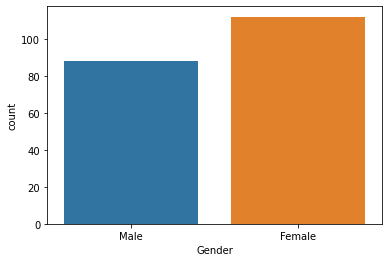

In [6]:
sns.countplot(x = 'Gender', data = mall_customers)


<AxesSubplot:xlabel='Annual Income (k$)', ylabel='count'>

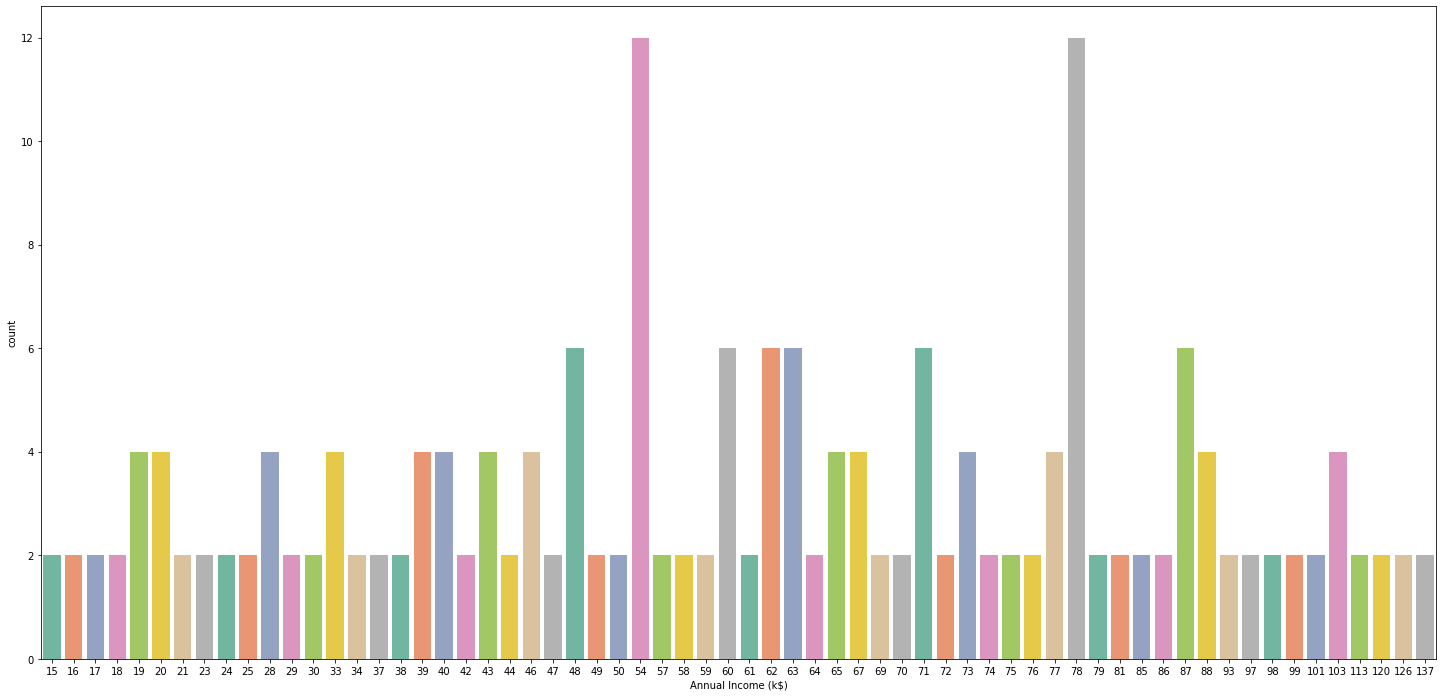

In [7]:
# Distribution of Customers Visiting The Mall
plt.figure(figsize = (25,12))
sns.countplot(x = 'Annual Income (k$)', data = mall_customers, palette='Set2')


<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='count'>

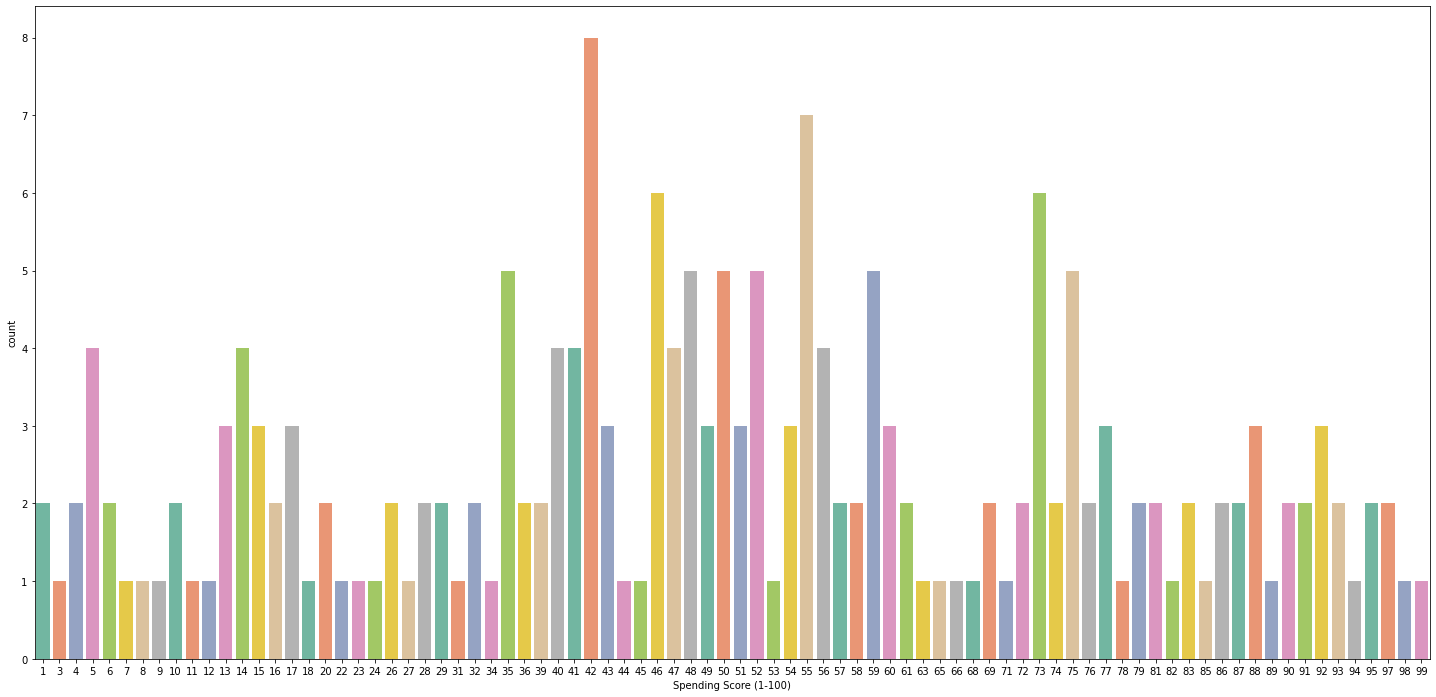

In [8]:
# Distribution of Customers Visiting Mall for Different Spending Score
plt.figure(figsize = (25,12))
sns.countplot(x = 'Spending Score (1-100)', data = mall_customers, palette='Set2')

### Features 

In [9]:
X = mall_customers.iloc[:, [3,4]]
X


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Elbow Method

In [10]:
from sklearn.cluster import KMeans

In [11]:
import warnings
warnings.filterwarnings('ignore')
# Use Elbow method to find optimum number of clusters (WCSS vs. Value of 'K')
wcss = []
for i in range(1, 16):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter=300, n_init = 10, random_state = 0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)


In [12]:
wcss

[269981.28,
 181363.59595959593,
 106348.37306211118,
 73679.78903948834,
 44448.45544793371,
 37265.86520484346,
 30259.65720728547,
 25095.703209997548,
 21830.041978049438,
 20736.679938924124,
 17702.59593229628,
 15810.838613705502,
 14763.330402558204,
 13165.329070181626,
 12064.939000692291]

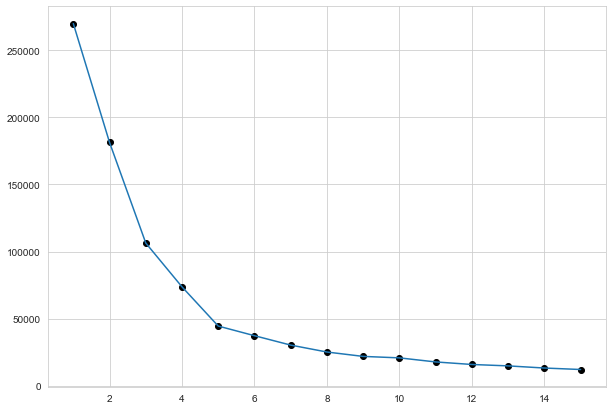

In [13]:
sns.set_style('whitegrid')
plt.figure(figsize = (10,7))
plt.plot(range(1,16), wcss)
plt.scatter(range(1,16), wcss, marker = 'o' , color = 'k')


### Optimum value of K = 5

In [14]:
# k-means++ : selects initial cluster centers for k-means clustering in a smart way to speed up convergence
# max_iter = Number of Iterations
# n_init = Number of time the k-means algorithm will be run with different centroid seeds
kmeans = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)


In [17]:
kmeans.fit(X)

KMeans(n_clusters=5, random_state=0)

In [18]:
y_clusters = kmeans.predict(X)
y_clusters


array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [19]:
# Centroids 
kmeans.cluster_centers_


array([[88.2       , 17.11428571],
       [55.2962963 , 49.51851852],
       [86.53846154, 82.12820513],
       [25.72727273, 79.36363636],
       [26.30434783, 20.91304348]])

### Cluster Visualization

In [20]:
y_clusters

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2], dtype=int32)

In [21]:
x_array = np.array(X)
x_array.astype


<function ndarray.astype>

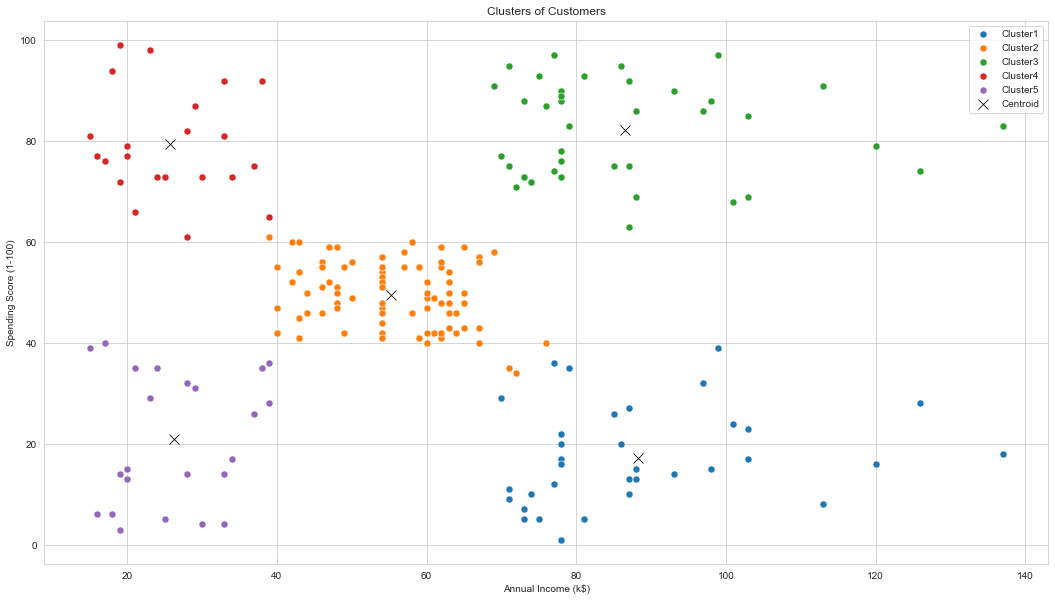

In [25]:
plt.figure(figsize = (18,10))
# x = Annual Income (k$), y = Spending Score (1-100)
sns.scatterplot(x = x_array[y_clusters == 0, 0], y = x_array[y_clusters == 0, 1], label = 'Cluster1', s = 50)
sns.scatterplot(x = x_array[y_clusters == 1, 0], y = x_array[y_clusters == 1, 1], label = 'Cluster2', s = 50)
sns.scatterplot(x = x_array[y_clusters == 2, 0], y = x_array[y_clusters == 2, 1], label = 'Cluster3', s = 50)
sns.scatterplot(x = x_array[y_clusters == 3, 0], y = x_array[y_clusters == 3, 1], label = 'Cluster4', s = 50)
sns.scatterplot(x = x_array[y_clusters == 4, 0], y = x_array[y_clusters == 4, 1], label = 'Cluster5', s = 50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], label = 'Centroid', s = 100, marker = 'x', color = 'black')

plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)') 
plt.show()

